### 빈칸을 채워서 그래프를 완성해주세요!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Model Scores:
Linear Regression: Train R² = 0.5510, Test R² = 0.6321
Polynomial Regression: Train R² = 0.9346, Test R² = 0.9275


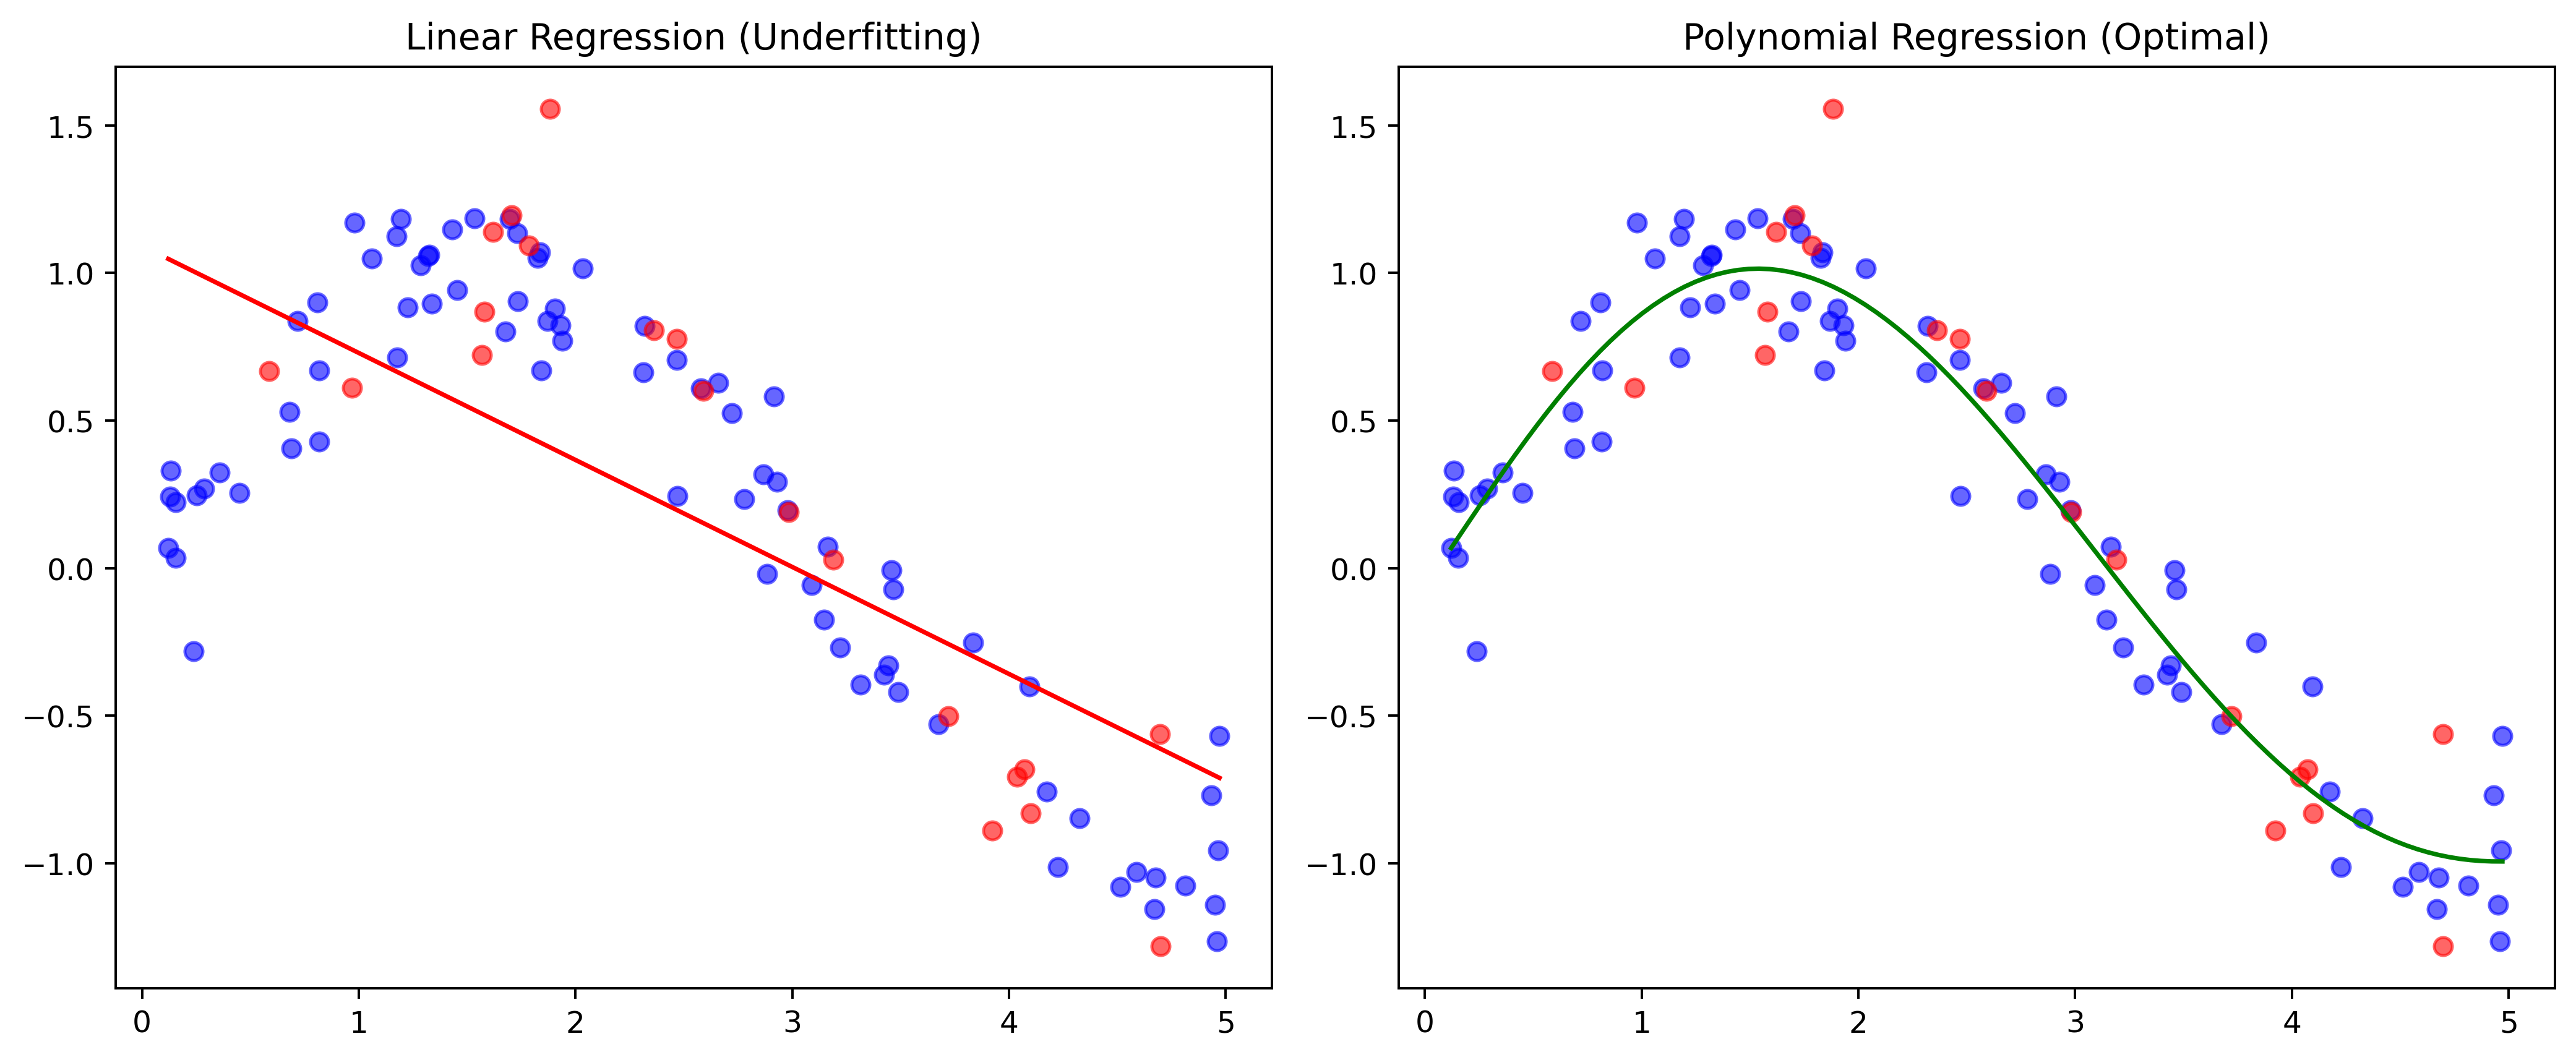

In [8]:
# 데이터 생성
np.random.seed(30)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + 0.2 * np.random.randn(100)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 선형 회귀 모델
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# 다항 회귀 모델
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# 모델 점수 출력
print("Model Scores:")
print(f"Linear Regression: Train R² = {linear_reg.score(X_train, y_train):.4f}, Test R² = {r2_score(y_test, linear_reg.predict(X_test)):.4f}")
print(f"Polynomial Regression: Train R² = {poly_reg.score(X_train_poly, y_train):.4f}, Test R² = {r2_score(y_test, poly_reg.predict(X_test_poly)):.4f}")

# 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=350)
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

# 선형 회귀 그래프
axes[0].scatter(X_train, y_train, color='blue', alpha=0.6)
axes[0].scatter(X_test, y_test, color='red', alpha=0.6)
axes[0].plot(X_range, linear_reg.predict(X_range), color='red')
axes[0].set_title("Linear Regression (Underfitting)")

# 다항 회귀 그래프
axes[1].scatter(X_train, y_train, color='blue', alpha=0.6)
axes[1].scatter(X_test, y_test, color='red', alpha=0.6)
axes[1].plot(X_range, poly_reg.predict(X_range_poly), color='green')
axes[1].set_title("Polynomial Regression (Optimal)")
plt.tight_layout()
plt.show()

Polynomial Regression: Train R² = 0.9393, Test R² = 0.3196
Ridge Regression: Train R² = 0.8947, Test R² = 0.6201
Lasso Regression: Train R² = 0.7491, Test R² = 0.5557


C:\Users\nangc\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+00, tolerance: 1.027e-03
  model = cd_fast.enet_coordinate_descent(


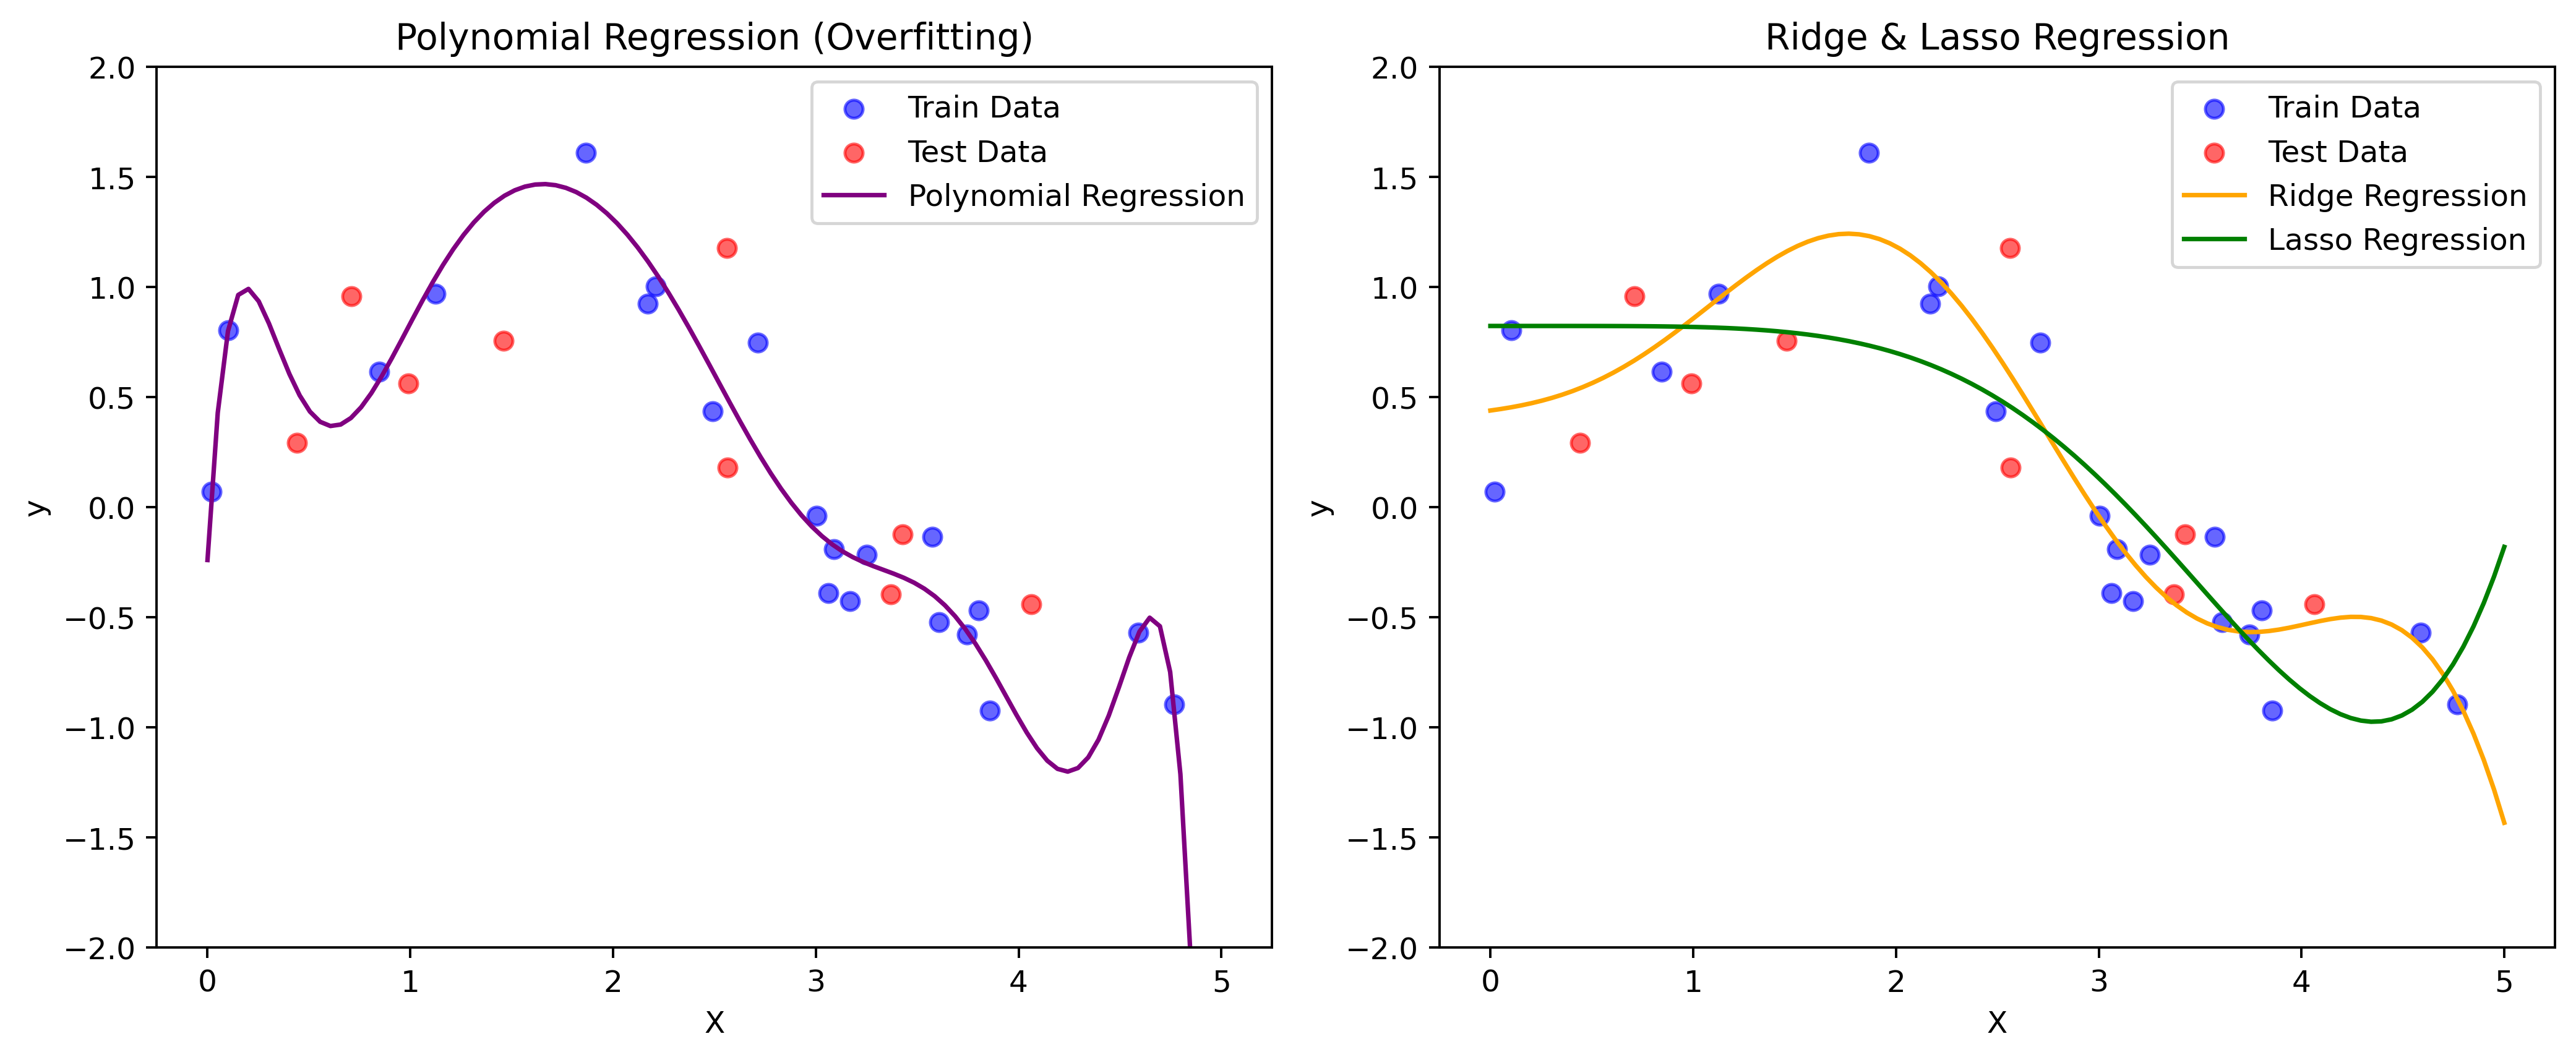

In [9]:
# 데이터 생성
np.random.seed(10)
X = np.sort(5 * np.random.rand(30, 1), axis=0)
y = np.sin(X).ravel() + 0.5 * np.random.randn(30)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# 다항식 변환
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 모델 학습 및 평가
models = {
    "Polynomial Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0)
}

for name, model in models.items():
    model.fit(X_train_poly, y_train)
    print(f"{name}: Train R² = {model.score(X_train_poly, y_train):.4f}, Test R² = {model.score(X_test_poly, y_test):.4f}")

# 새로운 X 범위 생성
X_range = np.linspace(0, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

# 예측값 생성
y_pred_poly = models["Polynomial Regression"].predict(X_range_poly)
y_pred_ridge = models["Ridge Regression"].predict(X_range_poly)
y_pred_lasso = models["Lasso Regression"].predict(X_range_poly)

# 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=350)

# 다항 회귀 그래프
axes[0].scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.6)
axes[0].scatter(X_test, y_test, color='red', label='Test Data', alpha=0.6)
axes[0].plot(X_range, y_pred_poly, color='purple', label='Polynomial Regression')
axes[0].set_title("Polynomial Regression (Overfitting)")
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].legend()
axes[0].set_ylim([-2, 2])

# 릿지 & 라쏘 회귀 그래프
axes[1].scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.6)
axes[1].scatter(X_test, y_test, color='red', label='Test Data', alpha=0.6)
axes[1].plot(X_range, y_pred_ridge, color='orange', label='Ridge Regression')
axes[1].plot(X_range, y_pred_lasso, color='green', label='Lasso Regression')
axes[1].set_title("Ridge & Lasso Regression")
axes[1].set_xlabel("X")
axes[1].set_ylabel("y")
axes[1].legend()
axes[1].set_ylim([-2, 2])

plt.tight_layout()
plt.show()


### 유방암 진단 이진 분류 과제
유방암 데이터셋을 활용하여 이진 분류 모델을 학습하고
Accuracy, Precision, Recall, F1 Score를 사용해 성능을 비교하세요.

다음 4가지 분류 알고리즘 중 최소 2개 이상을 선택하여 실습 후 분류 지표 4개를 선택하여 출력하세요

	1.	로지스틱 회귀 (Logistic Regression)
	2.	K-최근접 이웃 (K-Nearest Neighbors, KNN)
	3.	랜덤 포레스트 (Random Forest)

각 모델의 예측 결과에 대해 다음 지표들을 출력하고 비교하세요:

	1.	정확도 (Accuracy)
	2.	정밀도 (Precision)
	3.	재현율 (Recall)
	4.	F1 Score


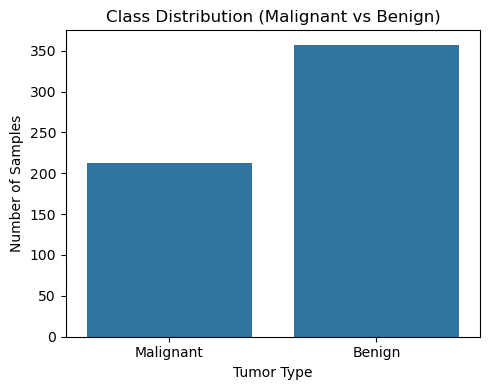

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer

# 데이터 불러오고 DataFrame으로 변환
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign

# 클래스(종양 유형) 분포 시각화
plt.figure(figsize=(5, 4))
sns.countplot(x='target', data=df)
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title("Class Distribution (Malignant vs Benign)")
plt.xlabel("Tumor Type")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. 데이터 로드
data = load_breast_cancer()
X, y = data.data, data.target

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=______, random_state=42)  # 빈칸1

# 3. 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. 모델 정의 (2개만 선택하여 주석 해제하고 빈칸 채우기)
models = {
    # "Logistic Regression": LogisticRegression(______=1000),       # 빈칸2
    # "K-Nearest Neighbors": KNeighborsClassifier(______=5),         # 빈칸3
    # "Random Forest": RandomForestClassifier(_______=100)           # 빈칸4
}

# 5. 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"📌 Model: {name}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
    print("-" * 30)

Model: Logistic Regression
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.9444
Precision: 0.9494
Recall: 0.9444
F1 Score: 0.9436
------------------------------
Model: Decision Tree
Accuracy: 0.9444
Precision: 0.9463
Recall: 0.9444
F1 Score: 0.9440
------------------------------
Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------
